In [2]:
import pandas as pd,seaborn as sns,numpy as np,xgboost as xgb,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df=sns.load_dataset("penguins")
df = df.dropna()
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,Male
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
315,Gentoo,Biscoe,50.8,15.7,226.0,5200.0,Male


In [ ]:
df["flipper_length_mm"].value_counts()

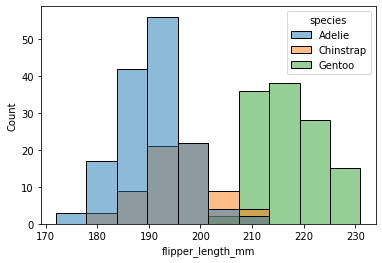

In [5]:
sns.histplot(data=df,x="flipper_length_mm",hue="species")

In [6]:
df["bill_depth_mm"].value_counts()

17.0    12
18.5    10
18.6    10
17.9    10
15.0    10
        ..
20.1     1
20.6     1
14.9     1
13.2     1
20.8     1
Name: bill_depth_mm, Length: 79, dtype: int64

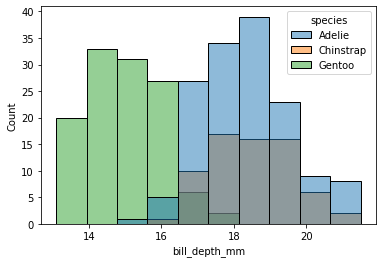

In [7]:
sns.histplot(data=df,x="bill_depth_mm",hue="species")

In [8]:
species_label = {"Adelie":0,"Chinstrap":1,"Gentoo":2}
sex_label = {"Female":0,"Male":1}

In [9]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [10]:
df=df.replace({"species":species_label})

In [11]:
df=df.replace({"sex":sex_label})

In [12]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,1
1,0,Torgersen,39.5,17.4,186.0,3800.0,0
2,0,Torgersen,40.3,18.0,195.0,3250.0,0
4,0,Torgersen,36.7,19.3,193.0,3450.0,0
5,0,Torgersen,39.3,20.6,190.0,3650.0,1


In [13]:
x = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex"]]
y=df["species"]

In [14]:
x.sample(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
173,48.5,17.5,191.0,3400.0,1
99,43.2,18.5,192.0,4100.0,1
26,40.6,18.6,183.0,3550.0,1
230,40.9,13.7,214.0,4650.0,0
1,39.5,17.4,186.0,3800.0,0


In [15]:
y.sample(5)

77     0
244    2
165    1
109    0
154    1
Name: species, dtype: int64

distribution plots:

In [16]:
df=sns.load_dataset("tips")

In [17]:
df.sample(6)

,total_bill,tip,sex,smoker,day,time,size
68,20.23,2.01,Male,No,Sat,Dinner,2
213,13.27,2.50,Female,Yes,Sat,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
117,10.65,1.50,Female,No,Thur,Lunch,2
132,11.17,1.50,Female,No,Thur,Lunch,2
130,19.08,1.50,Male,No,Thur,Lunch,2


In [18]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [19]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

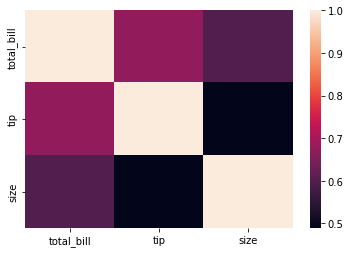

In [20]:
sns.heatmap(df.corr())

univerate

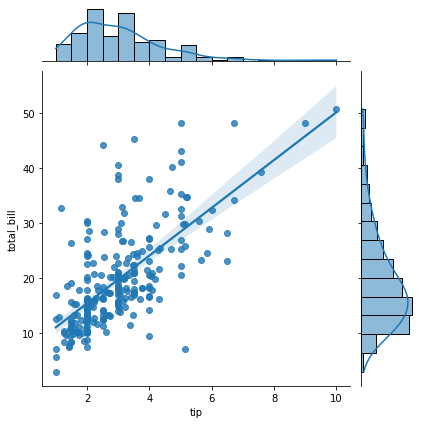

In [21]:
sns.jointplot(data=df,x="tip",y="total_bill",kind="reg")

In [22]:
df["size"].nunique()

6

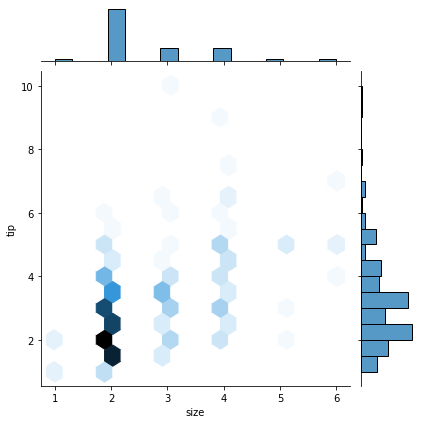

In [23]:
sns.jointplot(data=df,x="size",y="tip",kind="hex")

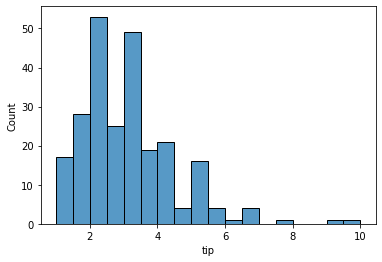

In [24]:
sns.histplot(data=df,x="tip")

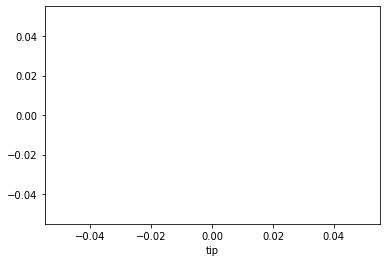

In [25]:
sns.scatterplot(data=df,x="tip")

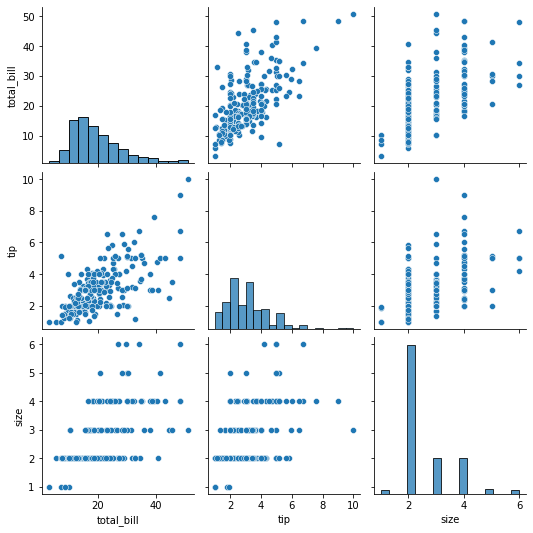

In [26]:
sns.pairplot(df)

In [29]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

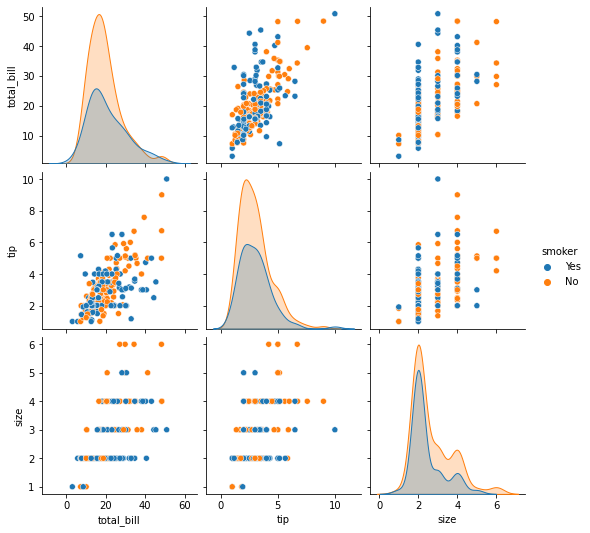

In [28]:
sns.pairplot(df,hue="smoker")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


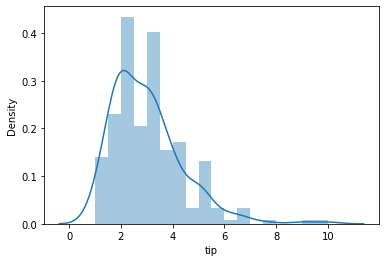

In [30]:
sns.distplot(df["tip"])

In [32]:
df["tip"].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


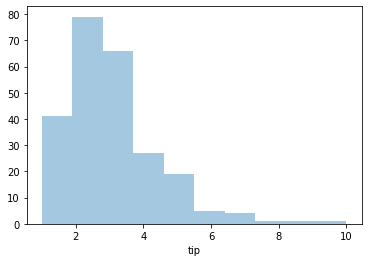

In [34]:
sns.distplot(df["tip"],kde=False,bins=10)

Categorical Plots using seaborn:
1. boxplot
2. violenplot
3. countplot
4. barplot

In [38]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
152,17.26,2.74,Male,No,Sun,Dinner,3
193,15.48,2.02,Male,Yes,Thur,Lunch,2
51,10.29,2.60,Female,No,Sun,Dinner,2
134,18.26,3.25,Female,No,Thur,Lunch,2
39,31.27,5.00,Male,No,Sat,Dinner,3


In countplot we have give value of only one features and for additional features we can use hue.

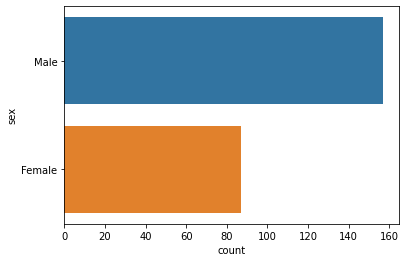

In [58]:
#countplot
sns.countplot(data=df,y="sex")

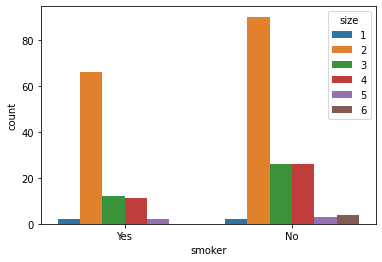

In [51]:
sns.countplot(data=df,x="smoker",hue="size")

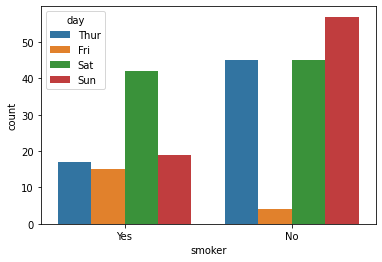

In [45]:
sns.countplot(data=df,x="smoker",hue="day")

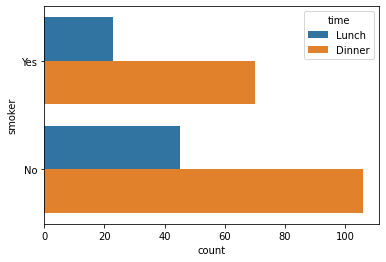

In [52]:
sns.countplot(data=df,y="smoker",hue="time")

In [54]:
df.sample(2)

,total_bill,tip,sex,smoker,day,time,size
114,25.71,4.00,Female,No,Sun,Dinner,3
165,24.52,3.48,Male,No,Sun,Dinner,3


In barplot we have to specify the value of both x and y axis.

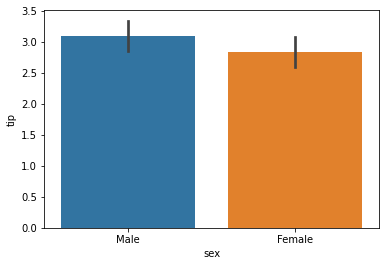

In [55]:
#Bar plot
sns.barplot(x="sex",y="tip",data=df)

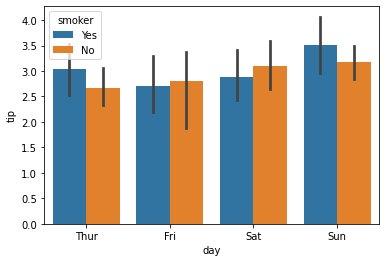

In [56]:
sns.barplot(x="day",y="tip",data=df,hue="smoker")

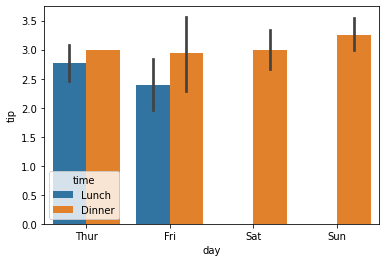

In [64]:
sns.barplot(x="day",y="tip",data=df,hue="time")

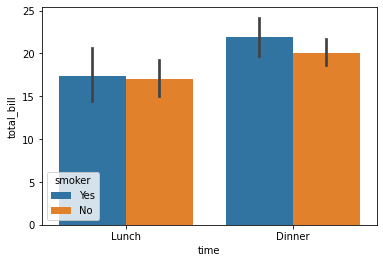

In [67]:
sns.barplot(data=df,y="total_bill",x="time",hue="smoker")

**Box plot**

In [68]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


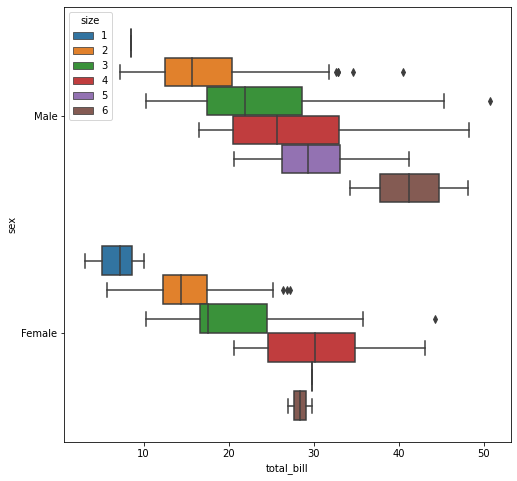

In [73]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,y="sex",x="total_bill",hue="size")
plt.show()

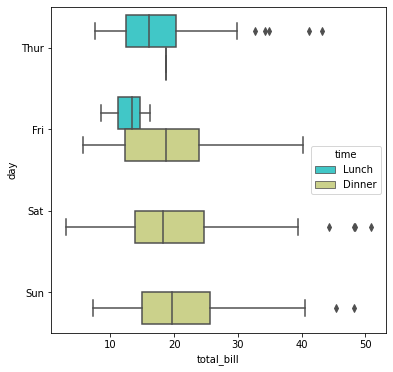

In [77]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,y="day",x="total_bill",palette="rainbow",hue="time")
plt.show()

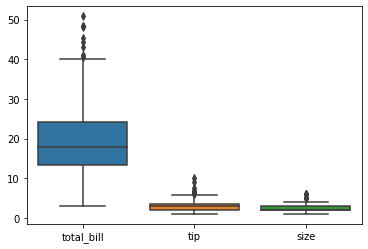

In [78]:
sns.boxplot(data=df,orient="v")

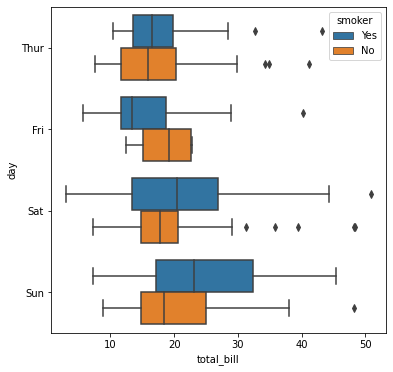

In [80]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="total_bill",y="day",hue="smoker")
plt.show()

**Violin plot**

violin plot helps to see both the distribution of data in terms of kernal density estimulation and the box plot

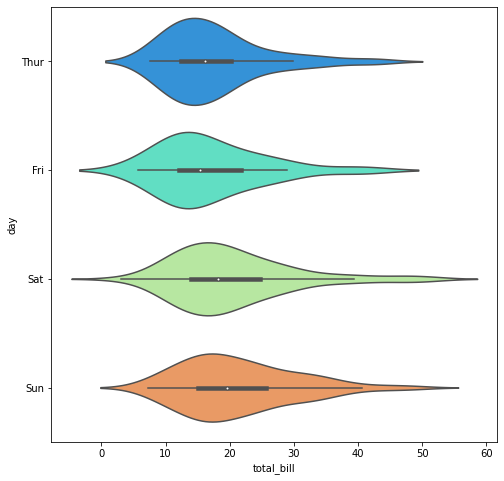

In [85]:
plt.figure(figsize=(8,8))
sns.violinplot(x="total_bill",y="day",data=df,palette="rainbow")
plt.show()

In [87]:
iris=sns.load_dataset("iris")

In [88]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


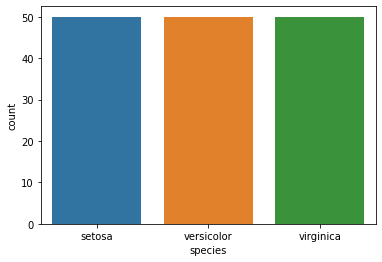

In [92]:
sns.countplot(data=iris,x="species")

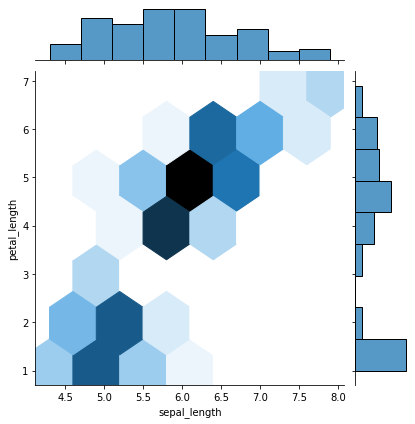

In [94]:
sns.jointplot(data=iris,x="sepal_length",y="petal_length",kind="hex")

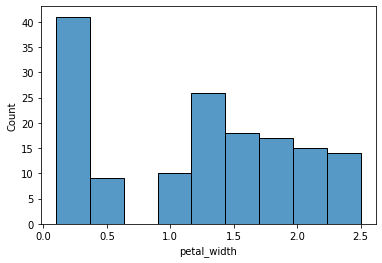

In [99]:
sns.histplot(data=iris,x="petal_width")

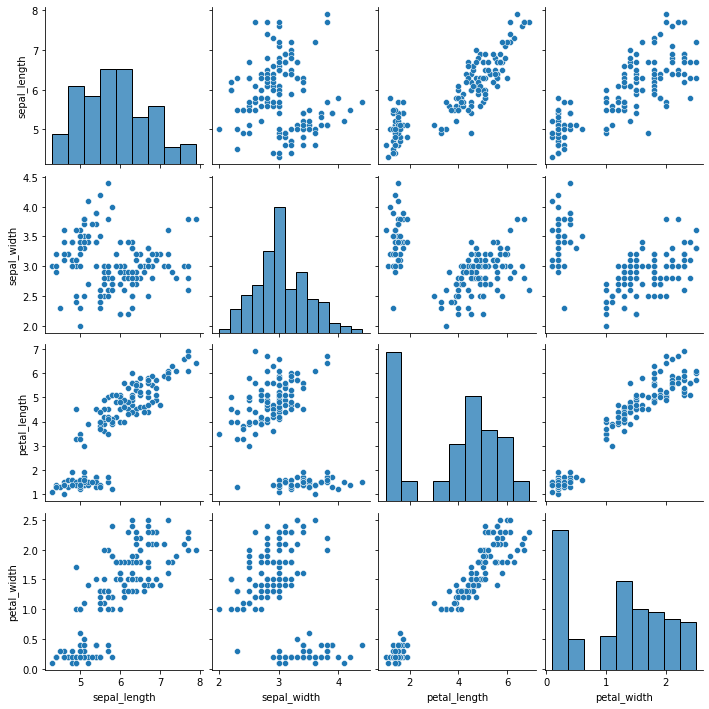

In [95]:
sns.pairplot(iris)

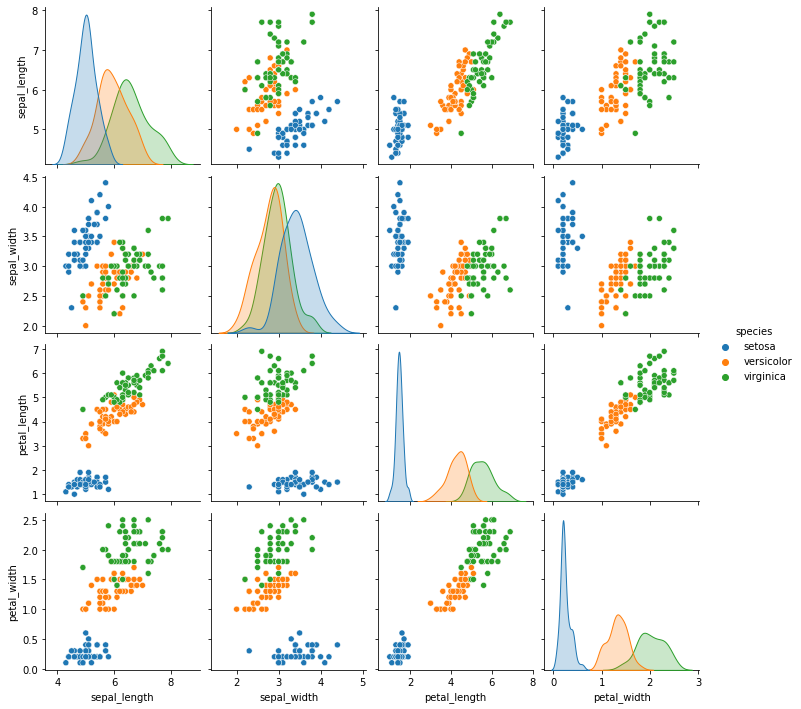

In [100]:
sns.pairplot(iris,hue="species")

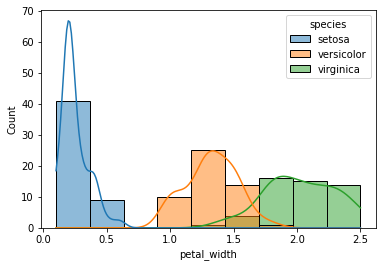

In [102]:
sns.histplot(data=iris,x="petal_width",hue="species",kde=True)

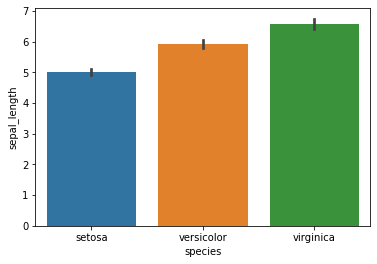

In [103]:
sns.barplot(data=iris,x="species",y="sepal_length")

In [108]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

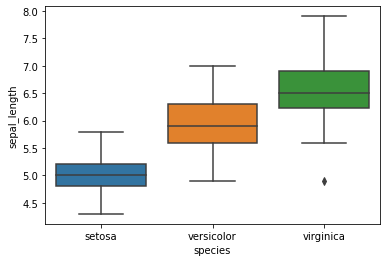

In [111]:
sns.boxplot(data=iris,y="sepal_length",x="species")

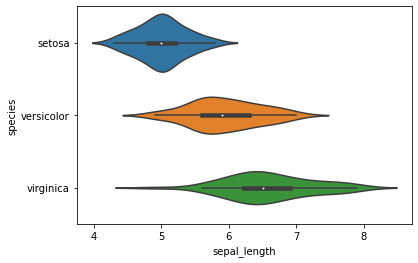

In [112]:
sns.violinplot(data=iris,x="sepal_length",y="species")